<a href="https://colab.research.google.com/github/thmswhelan/UCDPA_ThomasWhelan/blob/main/PropertyPricesIreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/thmswhelan/UCDPA_ThomasWhelan/main/Property_Price_Register_Ireland-28-05-2021.csv"

df_house = pd.read_csv(url)

In [9]:
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SALE_DATE           476745 non-null  object 
 1   ADDRESS             476745 non-null  object 
 2   POSTAL_CODE         89764 non-null   object 
 3   COUNTY              476745 non-null  object 
 4   SALE_PRICE          476745 non-null  float64
 5   IF_MARKET_PRICE     476745 non-null  int64  
 6   IF_VAT_EXCLUDED     476745 non-null  int64  
 7   PROPERTY_DESC       476745 non-null  object 
 8   PROPERTY_SIZE_DESC  52792 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.7+ MB


In [11]:
df_house["SALE_DATE"] = pd.to_datetime(df_house["SALE_DATE"])
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SALE_DATE           476745 non-null  datetime64[ns]
 1   ADDRESS             476745 non-null  object        
 2   POSTAL_CODE         89764 non-null   object        
 3   COUNTY              476745 non-null  object        
 4   SALE_PRICE          476745 non-null  float64       
 5   IF_MARKET_PRICE     476745 non-null  int64         
 6   IF_VAT_EXCLUDED     476745 non-null  int64         
 7   PROPERTY_DESC       476745 non-null  object        
 8   PROPERTY_SIZE_DESC  52792 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 32.7+ MB


In [12]:
pip install requests beautifulsoup4

In [13]:
import requests
import pandas as pd

url = "https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html"
response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    dfs = pd.read_html(page_content)  # Returns a list of DataFrames from HTML tables
    table_df = dfs[0]  # Assuming the first table is the one with the data
    # You might need to adjust the index if the target table is at a different position.
    print(table_df)
else:
    print("Failed to fetch the web page.")

                              Date (with effect from)  \
                                   Unnamed: 0_level_1   
0                                                2023   
1                                                2023   
2                                                2023   
3                                                2023   
4                                                2023   
5                                                2022   
6                                                2022   
7                                                2022   
8                                                2022   
9                                                2019   
10                                               2016   
11                                               2015   
12                                               2014   
13                                                NaN   
14                                               2013   
15                             

In [14]:
# Create a DataFrame from the provided data
df = pd.DataFrame(table_df)
df.head()

Date (with effect from)                      Deposit facility  \
       Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                    2023             2 Aug.               3.75   
1                    2023            21 Jun.               3.50   
2                    2023             10 May               3.25   
3                    2023            22 Mar.               3.00   
4                    2023             8 Feb.               2.50   

    Main refinancing operations                                         \
  Fixed rate tenders Fixed rate Variable rate tenders Minimum bid rate   
0                          4.25                                      -   
1                          4.00                                      -   
2                          3.75                                      -   
3                          3.50                                      -   
4                          3.00                                      -   

  Marginal lending facility  
         Unnamed: 5_level_1  
0                      4.50  
1                      4.25  
2                      4.00  
3                      3.75  
4                      3.25

In [15]:
columns_to_drop = ["Deposit facility", "Main refinancing operations"]
df_dropped = df.drop(columns=columns_to_drop)
df_dropped.head()

Date (with effect from)                    Marginal lending facility
       Unnamed: 0_level_1 Unnamed: 1_level_1        Unnamed: 5_level_1
0                    2023             2 Aug.                      4.50
1                    2023            21 Jun.                      4.25
2                    2023             10 May                      4.00
3                    2023            22 Mar.                      3.75
4                    2023             8 Feb.                      3.25

In [16]:
df_keep = pd.DataFrame(df_dropped)

# Flatten the multi-level column headers
df_keep.columns = df_keep.columns.map('_'.join)

# Select the specific columns you want
desired_columns = ["Date (with effect from)_Unnamed: 0_level_1", "Date (with effect from)_Unnamed: 1_level_1", "Marginal lending facility_Unnamed: 5_level_1"]
filtered_df = df_keep[desired_columns]


In [17]:
df_interest= pd.DataFrame(filtered_df)
print(df_interest)

           Date (with effect from)_Unnamed: 0_level_1  \
0                                                2023   
1                                                2023   
2                                                2023   
3                                                2023   
4                                                2023   
5                                                2022   
6                                                2022   
7                                                2022   
8                                                2022   
9                                                2019   
10                                               2016   
11                                               2015   
12                                               2014   
13                                                NaN   
14                                               2013   
15                                                NaN   
16                             

In [18]:
column_name = 'Date (with effect from)_Unnamed: 1_level_1'
pattern_to_remove = r'\.\d$|\.$|\.\s\d$'  # Regular expression to match ".#" at the end of a string

df_interest[column_name] = df_interest[column_name].str.replace(pattern_to_remove, '')
print(df_interest)

           Date (with effect from)_Unnamed: 0_level_1  \
0                                                2023   
1                                                2023   
2                                                2023   
3                                                2023   
4                                                2023   
5                                                2022   
6                                                2022   
7                                                2022   
8                                                2022   
9                                                2019   
10                                               2016   
11                                               2015   
12                                               2014   
13                                                NaN   
14                                               2013   
15                                                NaN   
16                             

<ipython-input-18-5f6760d074c3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_interest[column_name] = df_interest[column_name].str.replace(pattern_to_remove, '')


In [19]:
df_interest = df_interest.fillna(method='ffill')

In [20]:
df_interest['Combined']=df_interest['Date (with effect from)_Unnamed: 1_level_1'] + " "+ df_interest['Date (with effect from)_Unnamed: 0_level_1']
df_interest.head()

,Date (with effect from)_Unnamed: 0_level_1,Date (with effect from)_Unnamed: 1_level_1,Marginal lending facility_Unnamed: 5_level_1,Combined
0,2023,2 Aug,4.50,2 Aug 2023
1,2023,21 Jun,4.25,21 Jun 2023
2,2023,10 May,4.00,10 May 2023
3,2023,22 Mar,3.75,22 Mar 2023
4,2023,8 Feb,3.25,8 Feb 2023


In [21]:
columns_to_drop = ['Date (with effect from)_Unnamed: 0_level_1', 'Date (with effect from)_Unnamed: 1_level_1']
df_dropped = df_interest.drop(columns=columns_to_drop)

In [22]:
df_dropped.rename(columns={'Marginal lending facility_Unnamed: 5_level_1': 'ECB_INTEREST_RATE'}, inplace=True)
df_dropped.rename(columns={'Combined': 'DATE_INTEREST_RATE'}, inplace=True)
df_dropped.head()

,ECB_INTEREST_RATE,DATE_INTEREST_RATE
0,4.50,2 Aug 2023
1,4.25,21 Jun 2023
2,4.00,10 May 2023
3,3.75,22 Mar 2023
4,3.25,8 Feb 2023


In [23]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ECB_INTEREST_RATE   60 non-null     object
 1   DATE_INTEREST_RATE  60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [24]:
df_dropped.dtypes

ECB_INTEREST_RATE     object
DATE_INTEREST_RATE    object
dtype: object

In [25]:
df_interest_rate = df_dropped.drop(index=df_dropped.index[-2:])
print(df_interest_rate)

   ECB_INTEREST_RATE DATE_INTEREST_RATE
0               4.50         2 Aug 2023
1               4.25        21 Jun 2023
2               4.00        10 May 2023
3               3.75        22 Mar 2023
4               3.25         8 Feb 2023
5               2.75        21 Dec 2022
6               2.25         2 Nov 2022
7               1.50        14 Sep 2022
8               0.75        27 Jul 2022
9               0.25        18 Sep 2019
10              0.25        16 Mar 2016
11              0.30         9 Dec 2015
12              0.30        10 Sep 2014
13              0.40        11 Jun 2014
14              0.75        13 Nov 2013
15              1.00         8 May 2013
16              1.50        11 Jul 2012
17              1.75        14 Dec 2011
18              2.00         9 Nov 2011
19              2.25        13 Jul 2011
20              2.00        13 Apr 2011
21              1.75        13 May 2009
22              2.25         8 Apr 2009
23              2.50        11 Mar 2009


In [26]:
df_interest_rate['ECB_INTEREST_RATE'] = df_interest_rate['ECB_INTEREST_RATE'].astype(float)
df_interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ECB_INTEREST_RATE   58 non-null     float64
 1   DATE_INTEREST_RATE  58 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [27]:
column_name = 'DATE_INTEREST_RATE'
date_format = '%d %b %Y'  # Format to match "2 Aug 2023"

df_interest_rate[column_name] = pd.to_datetime(df_interest_rate[column_name], format=date_format)
df_interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ECB_INTEREST_RATE   58 non-null     float64       
 1   DATE_INTEREST_RATE  58 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [28]:
min_date = df_house['SALE_DATE'].min()
max_date = df_house['SALE_DATE'].max()
print(min_date)
print(max_date)

2010-01-01 00:00:00
2021-05-28 00:00:00


In [29]:
start_date = pd.to_datetime('2009-05-12')
end_date = pd.to_datetime('2022-07-31')

df_interest_rate = df_interest_rate[(df_interest_rate['DATE_INTEREST_RATE'] >= start_date) & (df_interest_rate['DATE_INTEREST_RATE'] <= end_date)]

print(df_interest_rate)

    ECB_INTEREST_RATE DATE_INTEREST_RATE
8                0.75         2022-07-27
9                0.25         2019-09-18
10               0.25         2016-03-16
11               0.30         2015-12-09
12               0.30         2014-09-10
13               0.40         2014-06-11
14               0.75         2013-11-13
15               1.00         2013-05-08
16               1.50         2012-07-11
17               1.75         2011-12-14
18               2.00         2011-11-09
19               2.25         2011-07-13
20               2.00         2011-04-13
21               1.75         2009-05-13


In [30]:
df_house['month_year'] = df_house['SALE_DATE'].dt.to_period('M')

In [31]:
monthly_mean_prices = df_house.groupby('month_year')['SALE_PRICE'].mean()
monthly_median_prices = df_house.groupby('month_year')['SALE_PRICE'].median()
print(monthly_mean_prices)
print(monthly_median_prices)

month_year
2010-01    262482.281768
2010-02    262360.086718
2010-03    247859.892452
2010-04    245323.651606
2010-05    237789.409767
               ...      
2021-01    320076.583334
2021-02    319343.726588
2021-03    300638.360090
2021-04    358679.560595
2021-05    304691.170665
Freq: M, Name: SALE_PRICE, Length: 137, dtype: float64
month_year
2010-01    220263.420
2010-02    216000.000
2010-03    210000.000
2010-04    211453.365
2010-05    203772.200
              ...    
2021-01    251050.500
2021-02    245000.000
2021-03    240000.000
2021-04    243000.000
2021-05    235000.000
Freq: M, Name: SALE_PRICE, Length: 137, dtype: float64


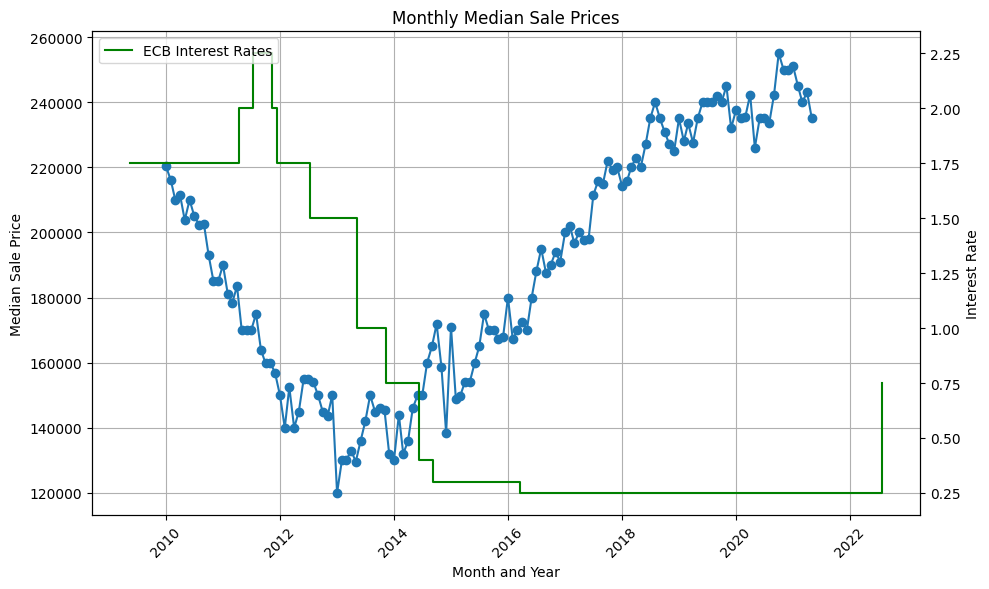

In [32]:
# Convert the index (month_year) to string for plotting
monthly_median_prices.index = monthly_median_prices.index.to_timestamp()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_median_prices.index, monthly_median_prices.values, marker='o')
plt.title('Monthly Median Sale Prices')
plt.xlabel('Month and Year')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Create a secondary y-axis for the second plot
ax1 = plt.gca()  # Get the current axes
ax2 = ax1.twinx()  # Create a twin axes sharing the xaxis

ax2.step(df_interest_rate['DATE_INTEREST_RATE'], df_interest_rate['ECB_INTEREST_RATE'],color='green', where='pre', label='ECB Interest Rates')
ax2.set_ylabel('Interest Rate')

# Combine legends from both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
df_interest_rate['ECB_INTEREST_RATE'] = df_interest_rate['ECB_INTEREST_RATE'].ffill()
merged_df = pd.merge(df_house, df_interest_rate, left_on='SALE_DATE', right_on='DATE_INTEREST_RATE', how='left')


# Iterate through each row in merged_df
for index, row in merged_df.iterrows():
    sale_date = row['SALE_DATE']

    # Find the latest ECB interest rate
    relevant_rates = df_interest_rate[df_interest_rate['DATE_INTEREST_RATE'] <= sale_date]
    if not relevant_rates.empty:
        latest_interest_rate = relevant_rates.iloc[0]['ECB_INTEREST_RATE']
        merged_df.at[index, 'ECB_INTEREST_RATE'] = latest_interest_rate

merged_df.head()

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC,month_year,ECB_INTEREST_RATE,DATE_INTEREST_RATE
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2010-01,1.75,NaT
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010-01,1.75,NaT
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2010-01,1.75,NaT
3,2010-01-04,"1 The Haven, Mornington",NaN,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2010-01,1.75,NaT
4,2010-01-04,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2010-01,1.75,NaT


In [34]:
merged_df.tail()

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC,month_year,ECB_INTEREST_RATE,DATE_INTEREST_RATE
476740,2021-05-28,"GRANGE STORES, GRANGE, MULLINGAR",NaN,Westmeath,150000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2021-05,0.25,NaT
476741,2021-05-28,"MAIN STREET, LOWER BORRIS, BORRIS",NaN,Carlow,170000.0,1,0,Second-Hand Dwelling house /Apartment,NaN,2021-05,0.25,NaT
476742,2021-05-28,"MULTYFARNHAM, WESTMEATH",NaN,Westmeath,175000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2021-05,0.25,NaT
476743,2021-05-28,"NO 2 RIVERLODGE, SHRONE, GLENGARIFF",NaN,Cork,240000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2021-05,0.25,NaT
476744,2021-05-28,"RABANE, KILL, COOTEHILL",NaN,Cavan,47000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2021-05,0.25,NaT


In [35]:
columns_to_drop = ['POSTAL_CODE', 'IF_MARKET_PRICE','IF_VAT_EXCLUDED','PROPERTY_SIZE_DESC','DATE_INTEREST_RATE']
merged_df.drop(columns=columns_to_drop, inplace=True)

In [36]:
merged_df.head()

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,PROPERTY_DESC,month_year,ECB_INTEREST_RATE
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,Second-Hand Dwelling house /Apartment,2010-01,1.75
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,New Dwelling house /Apartment,2010-01,1.75
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,Second-Hand Dwelling house /Apartment,2010-01,1.75
3,2010-01-04,"1 The Haven, Mornington",Meath,400000.0,Second-Hand Dwelling house /Apartment,2010-01,1.75
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,Second-Hand Dwelling house /Apartment,2010-01,1.75


In [37]:
merged_df['year'] = df_house['SALE_DATE'].dt.year
merged_df.head()

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,PROPERTY_DESC,month_year,ECB_INTEREST_RATE,year
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,Second-Hand Dwelling house /Apartment,2010-01,1.75,2010
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,New Dwelling house /Apartment,2010-01,1.75,2010
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,Second-Hand Dwelling house /Apartment,2010-01,1.75,2010
3,2010-01-04,"1 The Haven, Mornington",Meath,400000.0,Second-Hand Dwelling house /Apartment,2010-01,1.75,2010
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,Second-Hand Dwelling house /Apartment,2010-01,1.75,2010


In [38]:
print(merged_df['COUNTY'].unique())
print(merged_df['PROPERTY_DESC'].unique())

['Dublin' 'Laois' 'Meath' 'Kilkenny' 'Limerick' 'Carlow' 'Cork' 'Clare'
 'Sligo' 'Cavan' 'Tipperary' 'Wicklow' 'Roscommon' 'Wexford' 'Mayo'
 'Donegal' 'Longford' 'Galway' 'Offaly' 'Kildare' 'Waterford' 'Louth'
 'Kerry' 'Westmeath' 'Monaghan' 'Leitrim']
['Second-Hand Dwelling house /Apartment' 'New Dwelling house /Apartment'
 'Teach/�ras�n C�naithe Ath�imhe' 'Teach/�ras�n C�naithe Nua'
 'Teach/?ras?n C?naithe Nua']


In [39]:
# Define the replacement values and corresponding unique values to be replaced
replacement_mapping = {
    'Second-Hand Dwelling house /Apartment': 'Second Hand',
    'Teach/�ras�n C�naithe Ath�imhe': 'Second Hand',  # Updated with correct encoded value
    'New Dwelling house /Apartment': 'New',
    'Teach/�ras�n C�naithe Nua': 'New',
    'Teach/?ras?n C?naithe Nua': 'New'  # Updated with correct encoded value
}

# Replace values in the 'PROPERTY_DESC' column using the mapping
merged_df['PROPERTY_DESC'] = merged_df['PROPERTY_DESC'].replace(replacement_mapping)
print(merged_df['PROPERTY_DESC'].unique())

['Second Hand' 'New']


In [42]:
import seaborn as sns

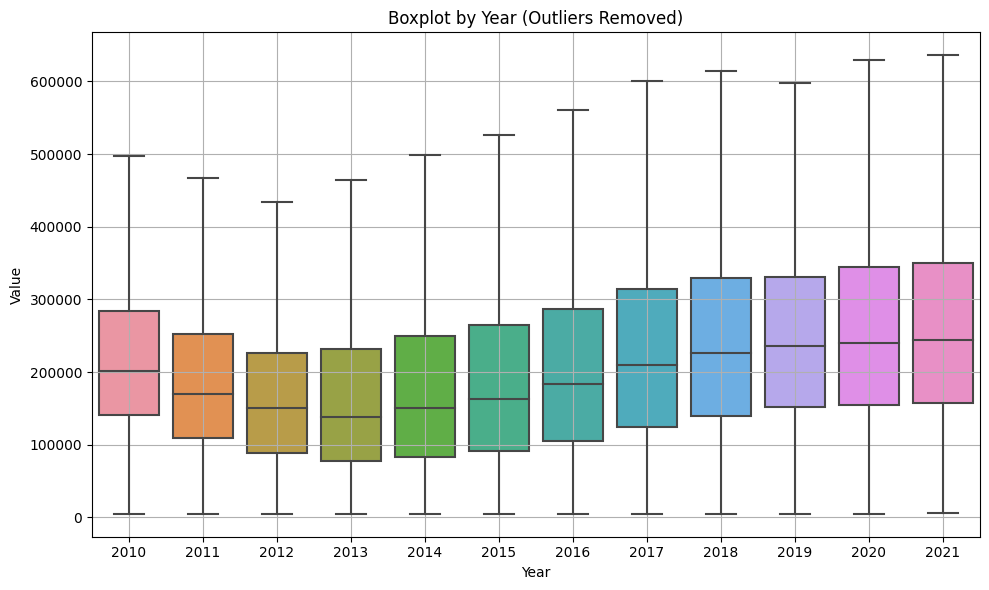

In [44]:
# Create a boxplot with outliers removed
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='SALE_PRICE', data=merged_df, showfliers=False)
plt.title('Boxplot by Year (Outliers Removed)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

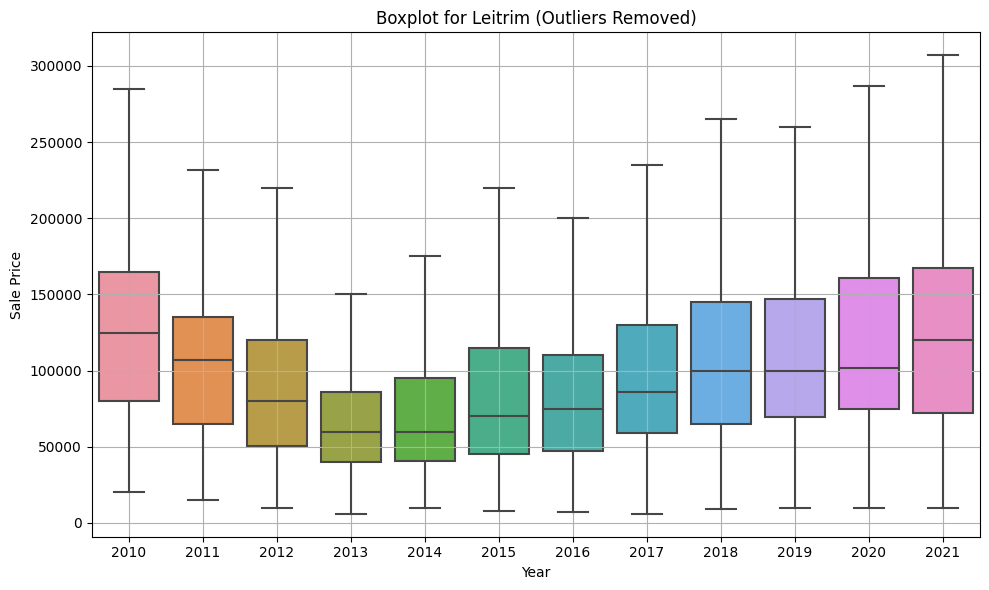

In [48]:
def county_boxplot(county_name):
    county_data = merged_df[merged_df['COUNTY'] == county_name]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='SALE_PRICE', data=county_data, showfliers=False)
    plt.title(f'Boxplot for {county_name} (Outliers Removed)')
    plt.xlabel('Year')
    plt.ylabel('Sale Price')
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# Call the function with a specific county name
county_boxplot('Leitrim')

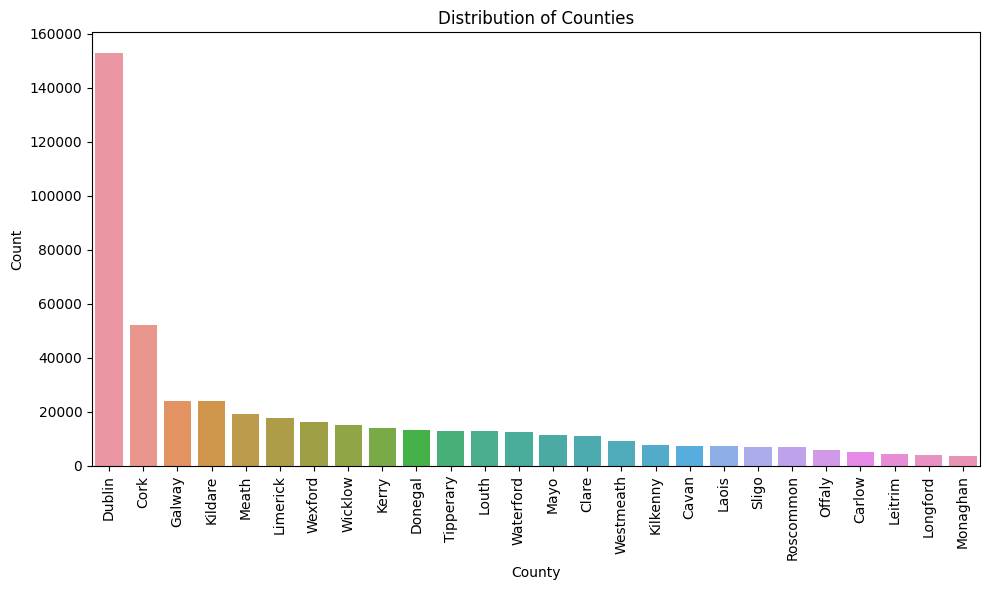

In [58]:
# Sort the data by the count of each category
sorted_df = merged_df['COUNTY'].value_counts().reset_index()
sorted_df.columns = ['COUNTY', 'COUNT']

# Create the histogram plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=sorted_df, x='COUNTY', y='COUNT')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Distribution of Counties')
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

<ipython-input-59-0d8aa7fdf1ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(),annot = True)


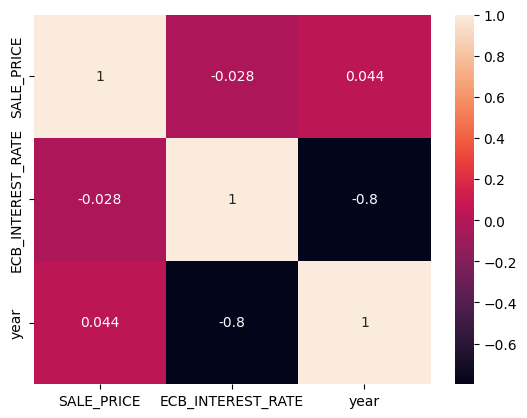

In [59]:
sns.heatmap(merged_df.corr(),annot = True)
plt.show()

In [60]:
# Normalize the sales_price column
merged_df['normalized_sales_price'] = (merged_df['sales_price'] - merged_df['sales_price'].min()) / (merged_df['sales_price'].max() - merged_df['sales_price'].min())

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

KeyError: ignored